In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [23]:
target=data['affairs'].astype(int)
for i in range(len(target)):
  if(target[i]>0):
    target[i] = 1

In [24]:
data['target'] = target
data = data.drop(['affairs'],axis = 'columns')

In [25]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,target
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [26]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
target             0
dtype: int64

DATA VISUALIZATION

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

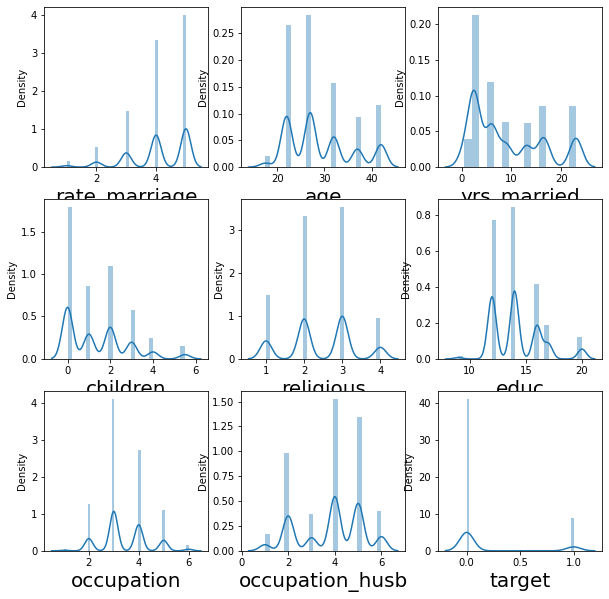

In [28]:
# let's see how data is distributed for every column
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

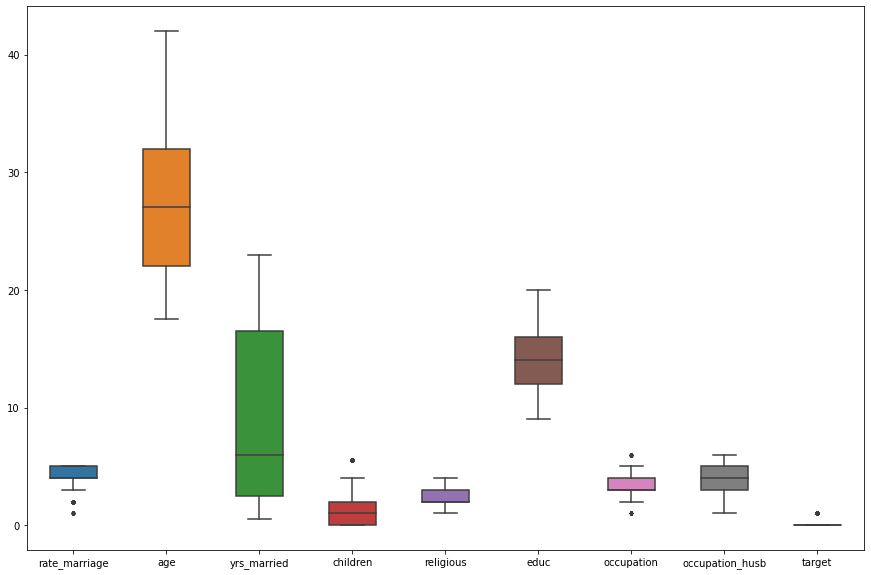

In [29]:
#checking for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

the data has few outliers

In [30]:
X = data.drop(['target'],axis = 'columns')
Y = data['target']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

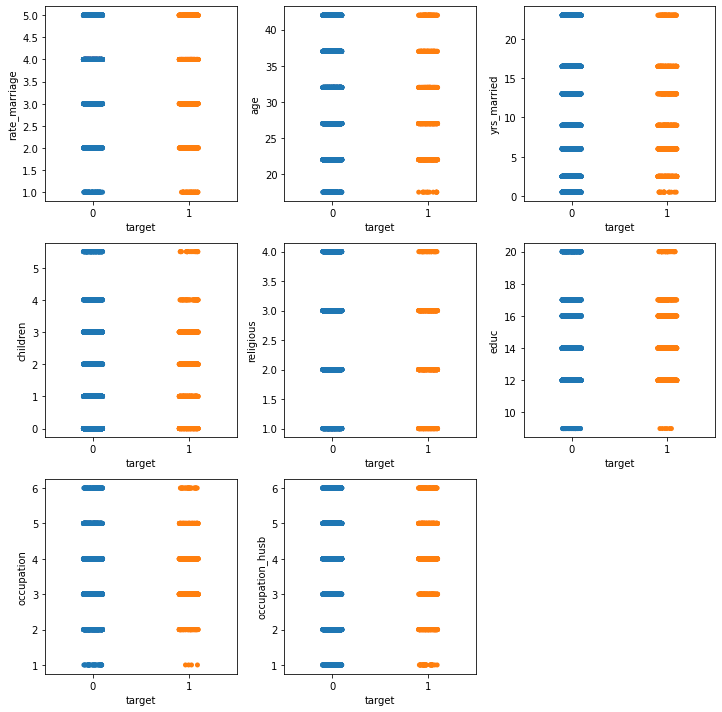

In [36]:
# let's see how data is distributed for every column
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(Y,X[column])
    plotnumber+=1
plt.tight_layout()

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)



vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


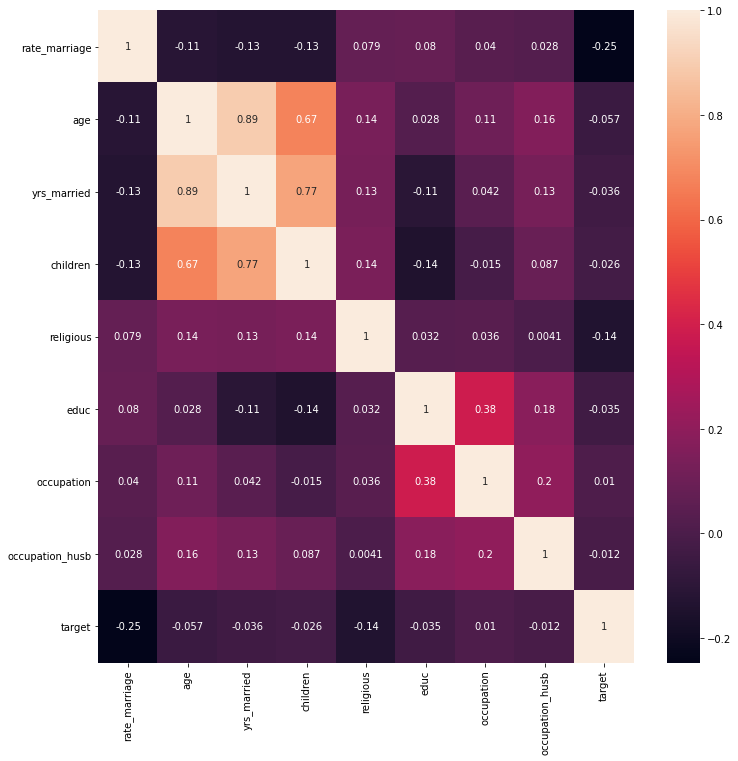

In [38]:
# age and yrs_married both have vif more than 5 so lets check for correlation
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot= True)

In [43]:
# age and yrs_married are having correlation value 0.89(high) to resolve this let's take a new columns with the average of the two

data['age_yrs_married'] = (data['age']+data['yrs_married'])/2
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,target,age_yrs_married
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0,20.50
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1,20.00
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1,12.25
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0,26.75
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1,18.00


In [46]:
data = data.drop(['yrs_married','age'],axis = 'columns')
data.head()

,rate_marriage,children,religious,educ,occupation,occupation_husb,target,age_yrs_married
0,3.0,3.0,3.0,17.0,2.0,5.0,0,20.50
1,3.0,3.0,1.0,14.0,3.0,4.0,1,20.00
2,4.0,0.0,1.0,16.0,3.0,5.0,1,12.25
3,4.0,4.0,3.0,16.0,5.0,5.0,0,26.75
4,5.0,1.0,1.0,14.0,3.0,4.0,1,18.00


In [48]:
X = data.drop(['target'],axis = 'columns')
Y = data['target']

X_scaled = scalar.fit_transform(X)



vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.034795,rate_marriage
1,2.329563,children
2,1.036595,religious
3,1.225309,educ
4,1.206643,occupation
5,1.082508,occupation_husb
6,2.324075,age_yrs_married


Now none of the vif values is more than 5 and we have resolved the collinearity lets create train and test data

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)


In [50]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
model.score(x_train,y_train)

0.8218774548311076

In [52]:
model.score(x_test,y_test)

0.8281004709576139

In [53]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [61]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.828100
Precision: 0.500000
Recall: 0.054795
F1 score: 0.098765
